#Case category dairy each district in Indonesia using K Nearest Neighbour test

#Import all of libraries that is required

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

##1. Preparation of Data

#Read in the "dairy_produsen" csv file as DataFrame called "dairy_produsen"

In [ ]:
dairy_produsen = pd.read_csv("/content/dairy_produsen.csv")

##Check the head data of "nutrition"

In [ ]:
dairy_produsen.head()

,index,fresh_milk,dairy_cows,dairy_company,category
0,0,0.00,22,0,nonprodusen
1,1,8980.41,5303,2,nonprodusen
2,2,835.32,756,4,nonprodusen
3,3,36.73,68,0,nonprodusen
4,4,3.66,13,0,nonprodusen


#Drop "index" column that it is useless for regression calculation

In [ ]:
dairy_produsen.drop(['index'],axis=1,inplace=True)

In [ ]:
dairy_produsen['category'] = dairy_produsen['category'].astype('category')
dairy_produsen['category'] = dairy_produsen['category'].cat.codes
dairy_produsen

,fresh_milk,dairy_cows,dairy_company,category
0,0.00,22,0,0
1,8980.41,5303,2,0
2,835.32,756,4,0
3,36.73,68,0,0
4,3.66,13,0,0
5,0.00,48,0,0
6,210.58,270,0,0
7,1757.81,1038,0,0
8,144.61,104,0,0
9,0.00,3,0,0


In [ ]:
dairy_produsen.head()

,fresh_milk,dairy_cows,dairy_company,category
0,0.00,22,0,0
1,8980.41,5303,2,0
2,835.32,756,4,0
3,36.73,68,0,0
4,3.66,13,0,0


#Check "dairy_produsen" info

In [ ]:
dairy_produsen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fresh_milk     34 non-null     float64
 1   dairy_cows     34 non-null     int64  
 2   dairy_company  34 non-null     int64  
 3   category       34 non-null     int8   
dtypes: float64(1), int64(2), int8(1)
memory usage: 978.0 bytes


##Check the "nutrition's shape

In [ ]:
dairy_produsen.shape

(34, 4)

#Check the dairy_produsen describe methods

In [ ]:
dairy_produsen.describe()

,fresh_milk,dairy_cows,dairy_company,category
count,34.000000,34.000000,34.000000,34.000000
mean,28499.416765,17438.147059,0.882353,0.088235
std,105734.900456,61229.303007,2.198687,0.287902
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000
50%,20.195000,53.000000,0.000000,0.000000
75%,679.135000,634.500000,0.000000,0.000000
max,543687.160000,314385.000000,8.000000,1.000000


#Check the dairy_produsen's shape

In [ ]:
dairy_produsen.category.value_counts()

0    31
1     3
Name: category, dtype: int64

#Show count plot diagram category

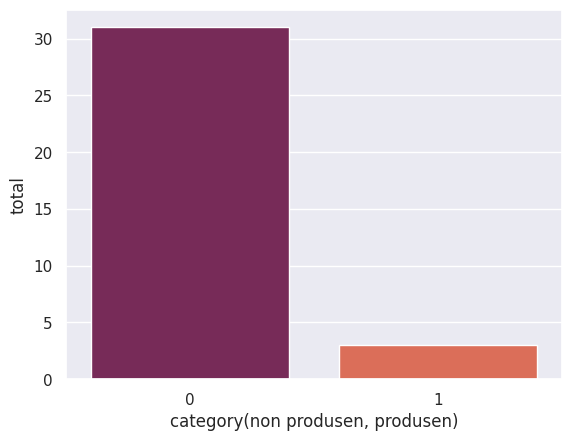

In [ ]:
sns.set_theme(style = "darkgrid")
sns.countplot(x="category",data = dairy_produsen, palette = 'rocket')
plt.ylabel('total')
plt.xlabel('category(non produsen, produsen)')
plt.show()


In [ ]:
dairy_produsen.duplicated().sum()

8

#Transform category data to be numerical data

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder ()
dairy_produsen['category'] = label_encoder.fit_transform(dairy_produsen['category'])

In [ ]:
dairy_produsen.head()

,fresh_milk,dairy_cows,dairy_company,category
0,0.00,22,0,0
1,8980.41,5303,2,0
2,835.32,756,4,0
3,36.73,68,0,0
4,3.66,13,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = dairy_produsen.drop(['category'],axis=1)
y = dairy_produsen['category']

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
print(X.shape)
print(y.shape)

(34, 3)
(34,)


#Split the data into training and testing sets. Set test size=0.3 and random test=0

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

#Import KNeighbourClassifier from sklearn.linear_model

In [ ]:
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
y_pred = kNN.predict(X_test)
kNN_acc = accuracy_score(y_pred, y_test)

#Print OLS kNN Result in watching performance model

In [ ]:
print(classification_report(y_test, y_pred))
print("Accuracy kNN: {:.2f}%".format(kNN_acc*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         1

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Accuracy kNN: 100.00%


#Test model using new data

In [ ]:
new_data = {'fresh_milk':[150000], 'dairy_cows': [500000], 'dairy_company':[3]}

In [ ]:
new_data = pd.DataFrame(new_data)

In [ ]:
new_data

,fresh_milk,dairy_cows,dairy_company
0,150000,500000,3


In [ ]:
scaled_new_data = scaler.transform(new_data)
y_pred_new = kNN.predict(scaled_new_data)

In [ ]:
print(y_pred_new)

[1]
